<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/tensorflow_CNN(ConvNet)%5Bdata_fashion_mnist%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN : fashion_mnist dataset

In [ ]:
#import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fashion_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


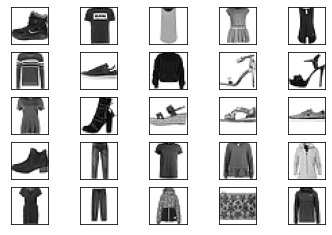

In [ ]:
#define class
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#visualize image only 25
for i in range(25) : 
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

# DNN model [Do not apply ConvNet]

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #Required process 
model_DNN = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape = (28, 28)), # change 2d to 1d  
                                         tf.keras.layers.Dense(128, activation= 'relu'), # lnstead of conv layer, dense layer makes propery map/ Dimension reduction
                                         tf.keras.layers.Dropout(0.2), # prevent overfit(input data' 20%[random] -> 0)
                                         tf.keras.layers.Dense(10, activation = 'softmax')]) # out layer = 10

model_DNN.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_DNN.fit(x_train, y_train, epochs = 5)
model_DNN.evaluate(x_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5313 - accuracy: 0.8124
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4021 - accuracy: 0.8544
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3682 - accuracy: 0.8658
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3483 - accuracy: 0.8738
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.8773
313/313 - 0s - loss: 0.3512 - accuracy: 0.8720


[0.35118189454078674, 0.871999979019165]

* DNN에서는 이미지의 공간적 특성들이 무시됨
* CNN에서는 밀집층 직전의 입력과 그 후의 출력만 완전연결층으로 만들어 이미지의 공간 정보 유지함

## CNN model

In [ ]:
#preprocess : Pixels : 0~255 -> 0 ~ 1
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) // 255.

In [ ]:
#CNN model
model_CNN = tf.keras.Sequential([
                                 tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                                 tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                                 tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                                 tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation = 'relu'),
                                 tf.keras.layers.Dense(10, activation = 'softmax')])

model_CNN.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

* Conv와 MaxPolling의 쌍으로 구성됨

In [ ]:
#training model & evaluation
model_CNN.fit(X_train_final, y_train, epochs = 5)
model_CNN.evaluate(X_test_final, y_test, verbose = 2) 

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.8470 - accuracy: 0.6850
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5743 - accuracy: 0.7888
Epoch 3/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5111 - accuracy: 0.8142
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4690 - accuracy: 0.8311
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4312 - accuracy: 0.8448
313/313 - 3s - loss: 3.1588 - accuracy: 0.1000


[3.158832311630249, 0.10000000149011612]

# explainable CNN : feature map visualization


In [ ]:
#library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# model - use to Sequential API
model_eCNN = tf.keras.models.Sequential([
                                         tf.keras.layers.Conv2D(input_shape = (100, 100, 3), activation = 'relu', kernel_size = (5, 5), filters = 32),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Flatten(),
                                         tf.keras.layers.Dense(128, activation = 'relu'),
                                         tf.keras.layers.Dense(64, activation = 'relu'),
                                         tf.keras.layers.Dense(32, activation = 'relu'),
                                         tf.keras.layers.Dense(2, activation = 'softmax')
])

model_eCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          1

In [ ]:
# feature map definition
ins = model_eCNN.inputs # (None, 100, 100, 3)
outs = model_eCNN.layers[0].output # first layer output (None, 96, 96, 32)
feature_map = Model(inputs = ins, outputs = outs)
feature_map.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


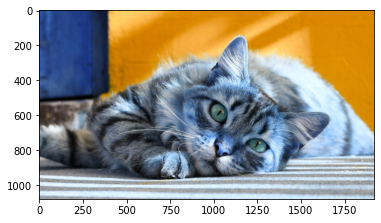

In [ ]:
#read image
img = "/content/drive/MyDrive/Colab Notebooks/실습파일/tensorflow/cat_ch5.jpg"
img = cv2.imread(img)
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


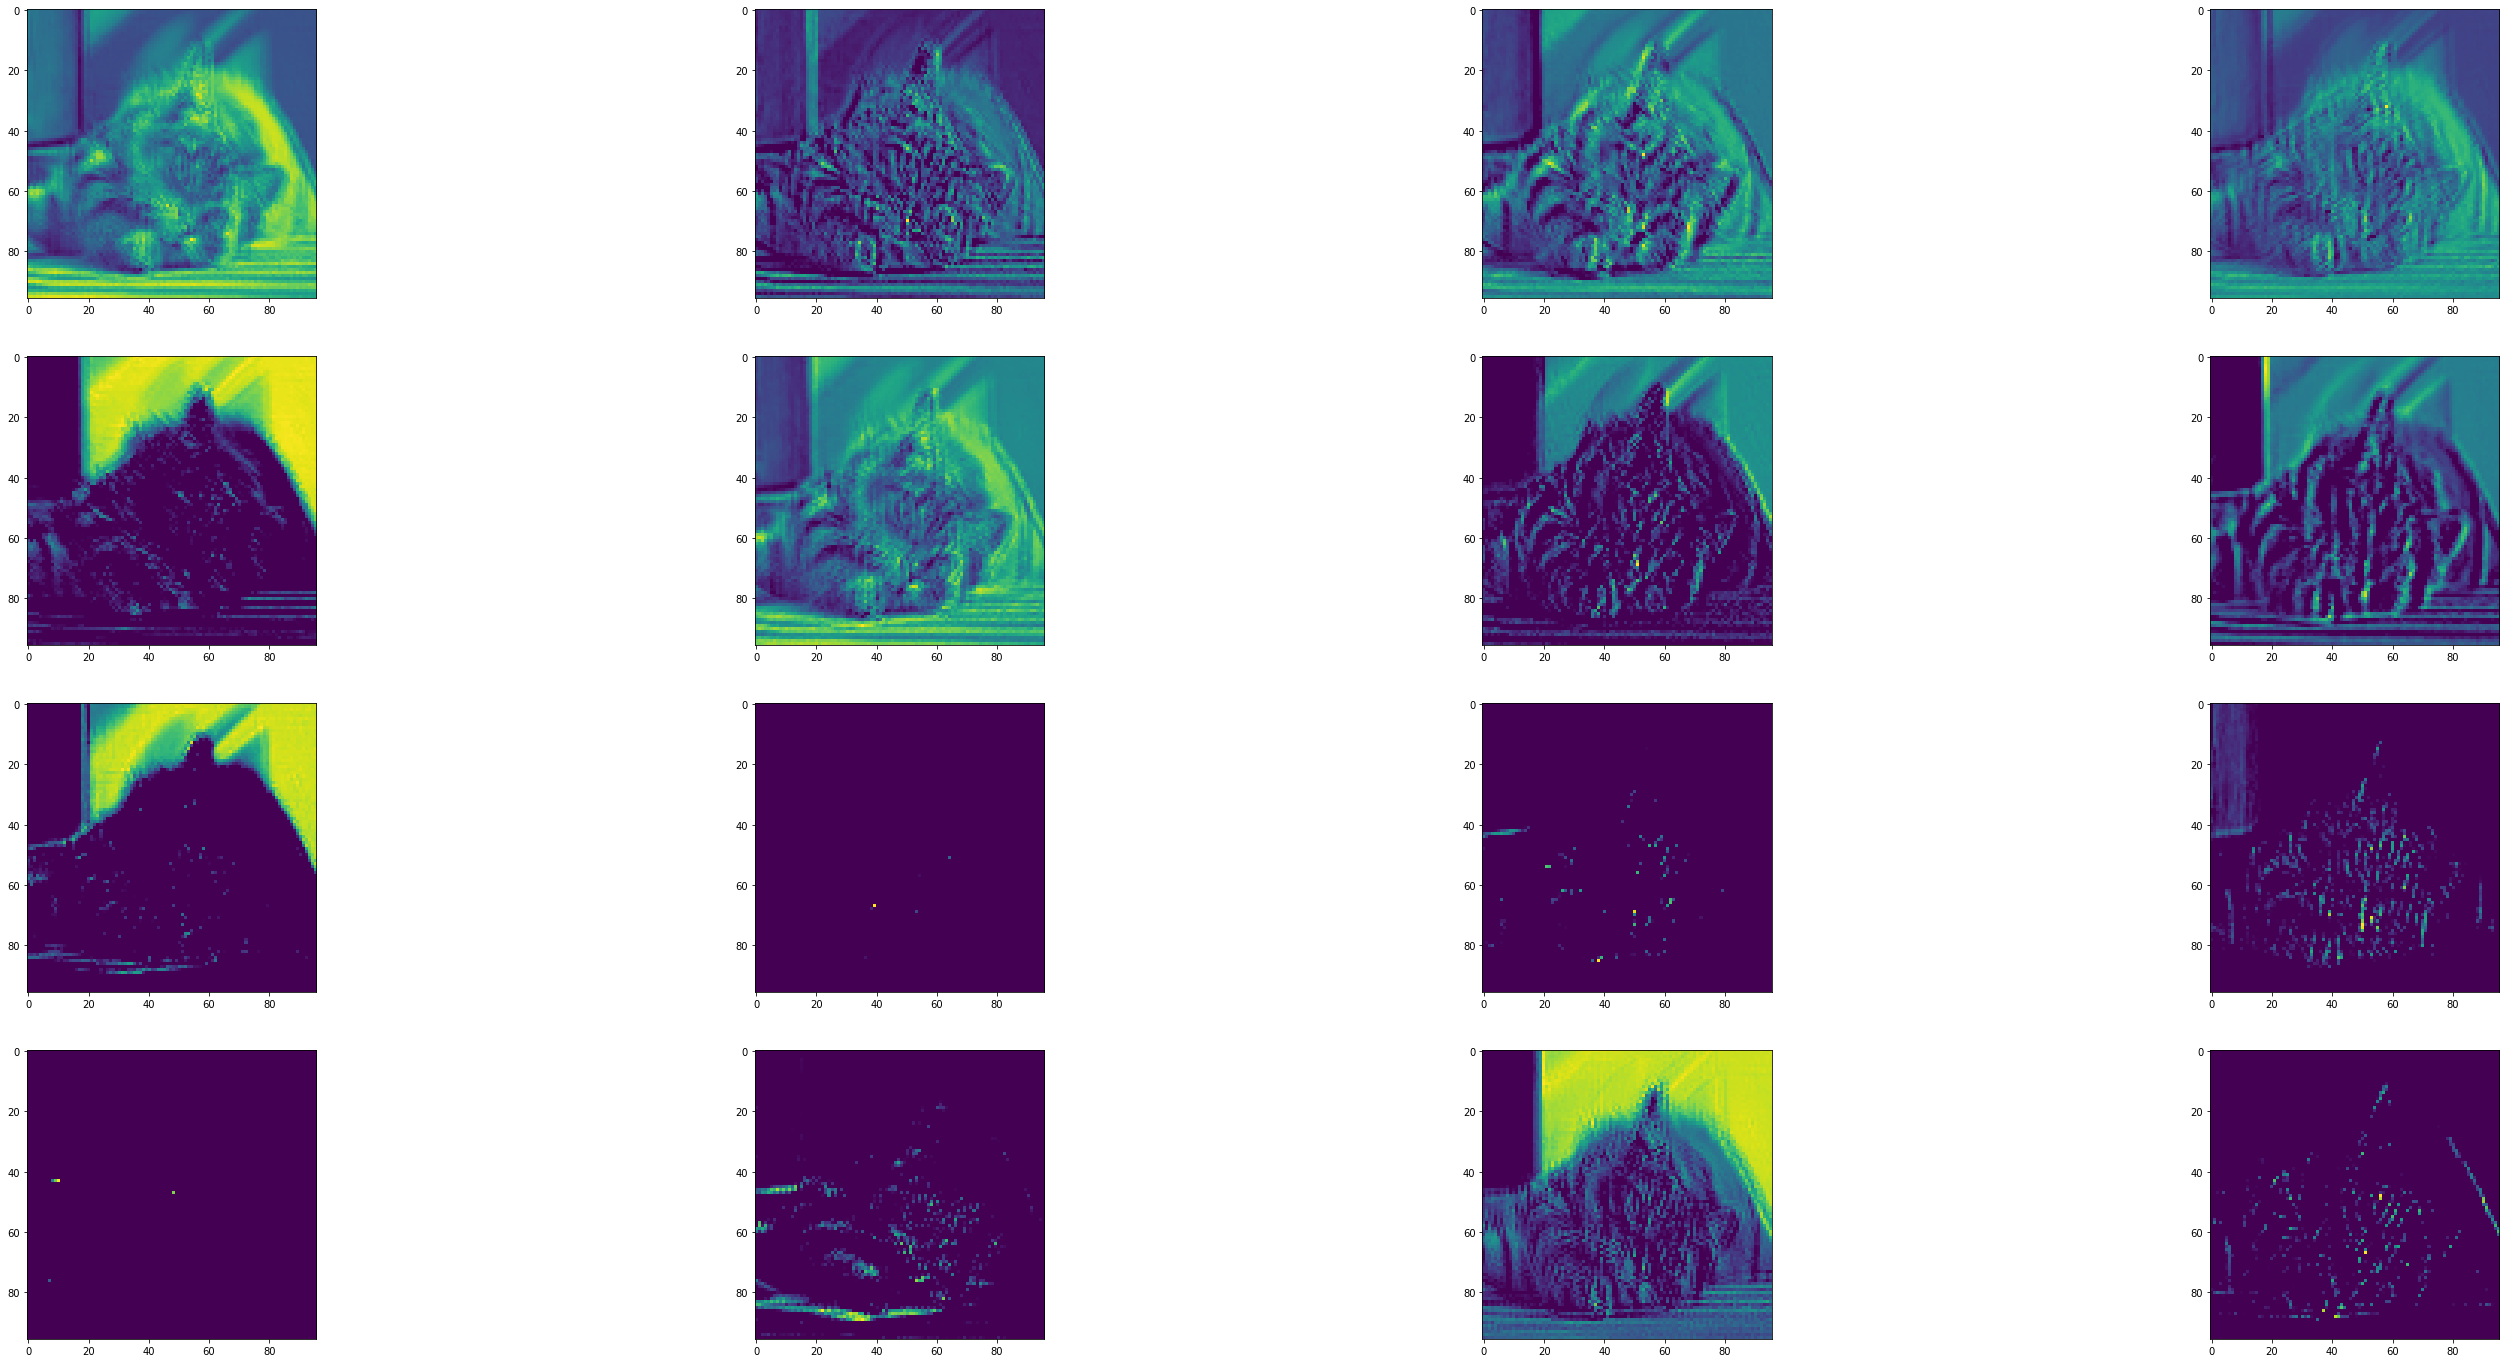

In [ ]:
# preprocess image & check feature map(first dense? / Layer close to the imput layer)
img = cv2.resize(img, (100, 100)) #resize image size
input_img = np.expand_dims(img, axis = 0) #adjust image dimension
print(input_img.shape)

feature = feature_map.predict(input_img) #apply image to model
print(feature.shape)

fig = plt.figure(figsize = (50, 50))
for i in range(16) : #print 16images
  ax = fig.add_subplot(8, 4, i+1) #subplot(m, n, p)
  ax.imshow(feature[0, :, :, i])

In [ ]:
#apply image to model & second layer
ins_2 = ins
outs_2 = model_eCNN.layers[2].output #shape : (None,1000)
feature_map2 = Model(inputs = ins_2, outputs = outs_2)

feature_2 = feature_map2.predict(input_img)
for i in range(48) :
  ax = fig.add_subplot(8, 8, i+1)
  ax.imshow(feature_2[0,:,:,i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [ ]:
#apply image to model & six layer
ins_6 = ins
outs_6 = model_eCNN.layers[6].output
feature_map6 = Model(inputs = ins_6, outputs = outs_6)

feature_6 = feature_map6.predict(input_img)
for i in range(48):
  ax = fig.add_subplot(8, 8, i+1)
  ax.imshow(feature_6[0, :, :, i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


# LeNet-5 : image classification

In [ ]:
#libray
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

skip image preprocessing


In [ ]:
#creat LeNet-5 class
num_classes = 2
class LeNet(Sequential):
  def __init__(self, input_shape, no_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', input_shape = input_shape, padding = "same"))
    self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    self.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = 'valid'))
    self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    self.add(Flatten())
    self.add(Dense(120, activation = 'relu'))
    self.add(Dense(84, activation = 'relu'))
    self.add(Dense(num_classes, activation = 'softmax'))

    self.compile(optimizer = 'adam',
                 loss = categorical_crossentropy,
                 metrics = ['accuracy'])

In [ ]:
#creat LeNet-5 model
model_LeNet5 = LeNet((100, 100, 3), num_classes)
model_LeNet5.summary()

Model: "le_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d_3 (Average (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8464)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               1015800   
_________________________________________________________________
dense_7 (Dense)              (None, 84)                101

In [ ]:
#reset parameter & read data
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data
train_dir = '/content/drive/MyDrive/Colab Notebooks/실습파일/catanddog/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/실습파일/catanddog/validation'

In [ ]:
#preprocessing
train = ImageDataGenerator(rescale = 1. / 255,
                           rotation_range = 10,
                           width_shift_range = 0.1,
                           height_shift_range = 0.1,
                           shear_range = 0.1,
                           zoom_range = 0.1)
train_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed = 1,
                                            shuffle = True,
                                            class_mode = "categorical")

valid = ImageDataGenerator(rescale= 1.0 / 255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                             target_size = (image_height, image_width),
                                             color_mode = 'rgb',
                                             batch_size = BATCH_SIZE,
                                             seed = 7,
                                             shuffle = True,
                                             class_mode = "categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
#add image
'''
#central_crop : 이미지의 바깥 부분을 제거하면서 이미지를 중앙영역에 위치시킴
train_dataset = train_dataset.map(lambda x, y: (tf.image.central_crop(x, 0.75), y))
#random_flip_left_right : 90도 회전한 이미지 생성
train_dataset = train_dataset.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
'''

In [41]:
#visualiz model training process to tensorboard
import datetime
log_dir = '/content/drive/MyDrive/Colab Notebooks/colab_python/LeNet5_log/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,
                                                      histogram_freq = 1,
                                                      profile_batch = 0)
model_LeNet5.fit(train_generator,
                 epochs = EPOCHS,
                 steps_per_epoch = train_num // BATCH_SIZE,
                 validation_data = valid_generator,
                 validation_steps = valid_num // BATCH_SIZE,
                 callbacks = [tensorboard_callback],
                  verbose = 1)

Epoch 1/100
12/12 [==============================] - 7s 616ms/step - loss: 0.3742 - accuracy: 0.8584 - val_loss: 1.1129 - val_accuracy: 0.5729
Epoch 2/100
12/12 [==============================] - 7s 552ms/step - loss: 0.2571 - accuracy: 0.8924 - val_loss: 1.3857 - val_accuracy: 0.6354
Epoch 3/100
12/12 [==============================] - 7s 554ms/step - loss: 0.2287 - accuracy: 0.9235 - val_loss: 1.2694 - val_accuracy: 0.6042
Epoch 4/100
12/12 [==============================] - 7s 535ms/step - loss: 0.1990 - accuracy: 0.9178 - val_loss: 1.3041 - val_accuracy: 0.6562
Epoch 5/100
12/12 [==============================] - 7s 552ms/step - loss: 0.2136 - accuracy: 0.9008 - val_loss: 1.3004 - val_accuracy: 0.6771
Epoch 6/100
12/12 [==============================] - 7s 550ms/step - loss: 0.2538 - accuracy: 0.9008 - val_loss: 1.1882 - val_accuracy: 0.5938
Epoch 7/100
12/12 [==============================] - 7s 556ms/step - loss: 0.2591 - accuracy: 0.8810 - val_loss: 1.2338 - val_accuracy: 0.5938

In [43]:
#load tensorboard
%tensorboard --logdir=/content/drive/MyDrive/Colab Notebooks/colab_python/LeNet5_log/

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2021-07-23 07:59:05.798911: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_